# DSCI 303 Final Project Draft

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# load training and testing data
train_data = pd.read_csv("/content/drive/MyDrive/DSCI 303/fraudTrain.csv")
test_data = pd.read_csv("/content/drive/MyDrive/DSCI 303/fraudTest.csv")

## Data Cleaning

In [ ]:
train_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
train_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
test_data.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
train_data[train_data.isna().any(axis=1)]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [ ]:
train_data = train_data.dropna()
test_data = test_data.dropna()

## Distribution Analysis

### Numerical variables


There are 11 numerical features including:
['Unnamed: 0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


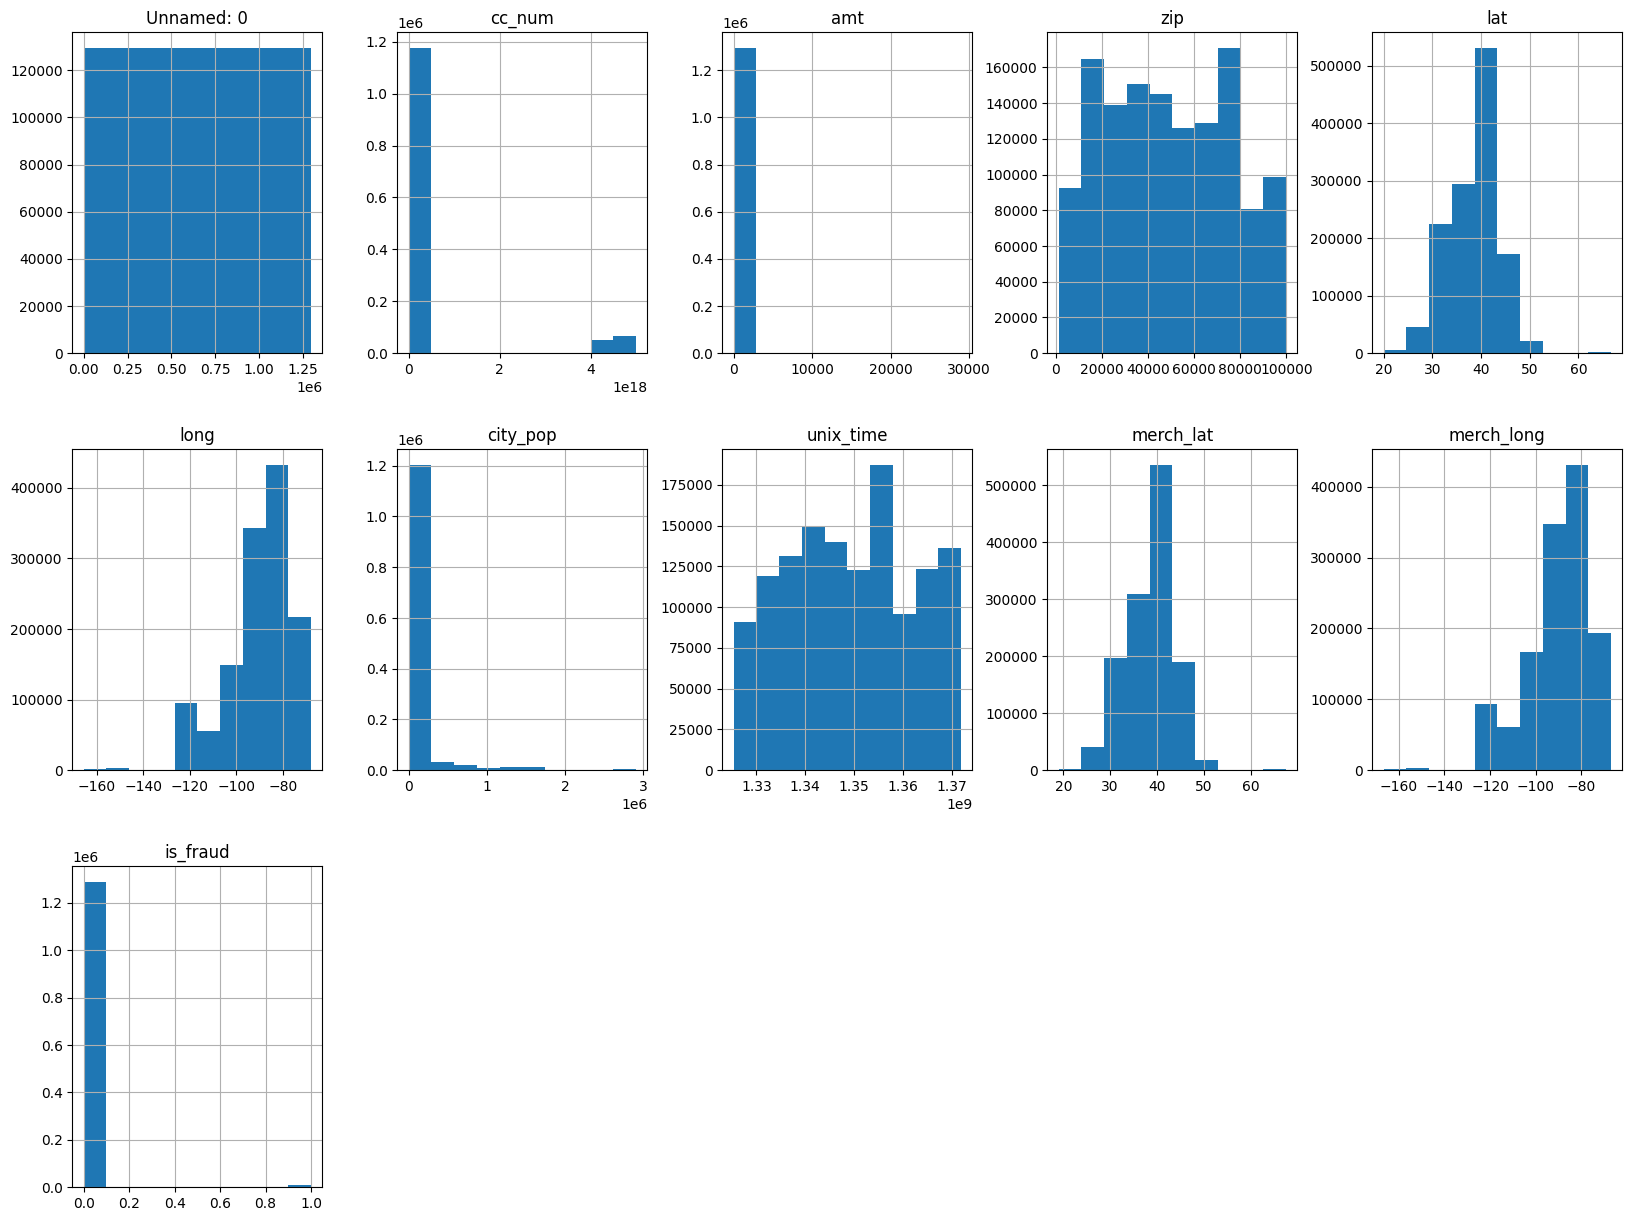

In [ ]:
train_numeric = train_data.select_dtypes(include = 'number')
print('There are {} numerical features including:\n{}'.format(len(train_numeric.columns), train_numeric.columns.tolist()))

train_numeric.hist(layout=(3, 5),figsize=(20, 15))
plt.show()

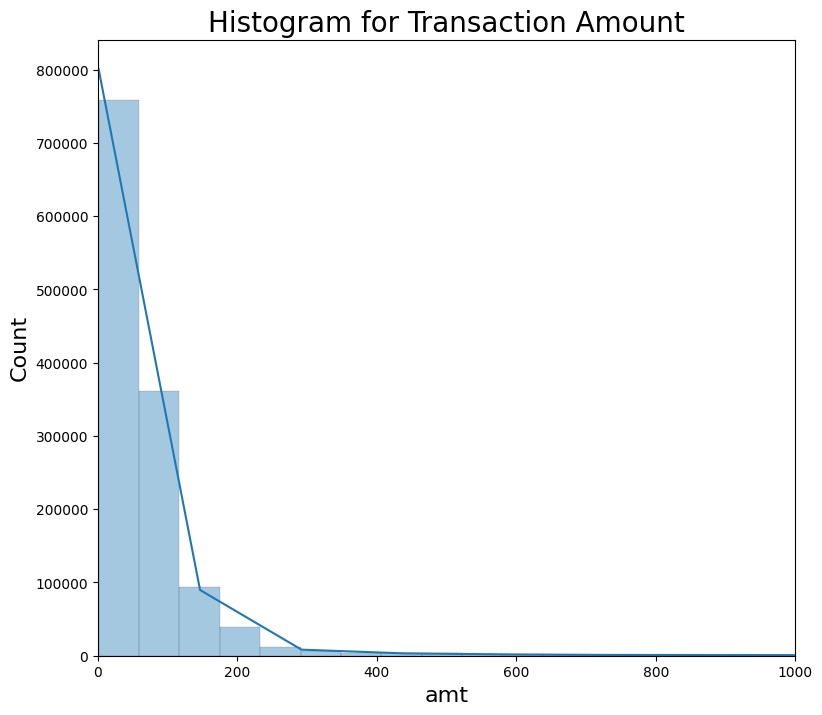

In [ ]:
plt.figure(figsize=(9, 8))
sns.histplot(data=train_data["amt"], bins=500, kde=True, alpha=0.4)
plt.xlim(0, 1000)  # Set x-axis limits from 0 to 6
plt.title('Histogram for Transaction Amount', fontsize = 20)
plt.xlabel('amt', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

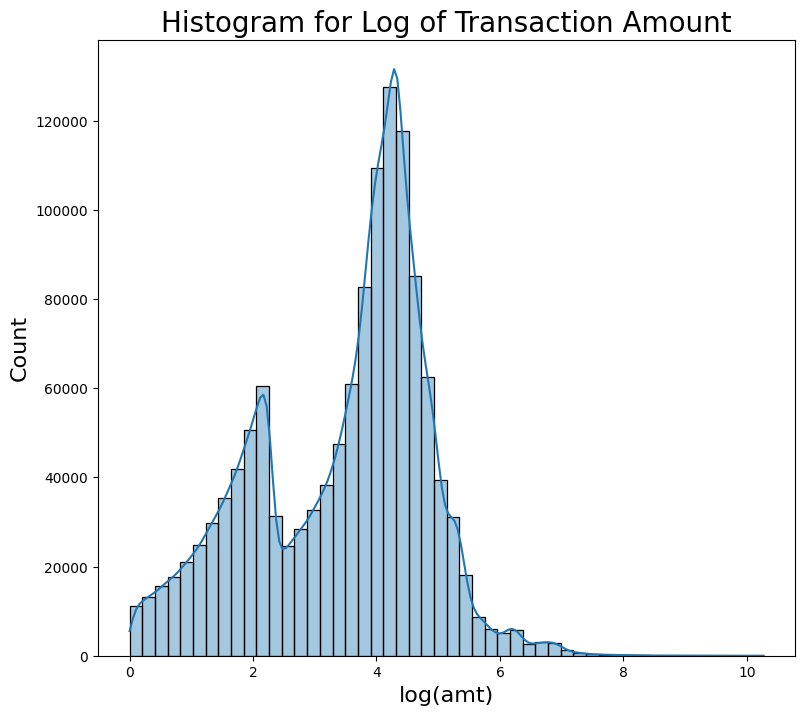

In [ ]:
plt.figure(figsize=(9, 8))
sns.histplot(data=np.log(train_data["amt"]), bins=50, kde=True, alpha=0.4)
plt.title('Histogram for Log of Transaction Amount', fontsize = 20)
plt.xlabel('log(amt)', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.show()

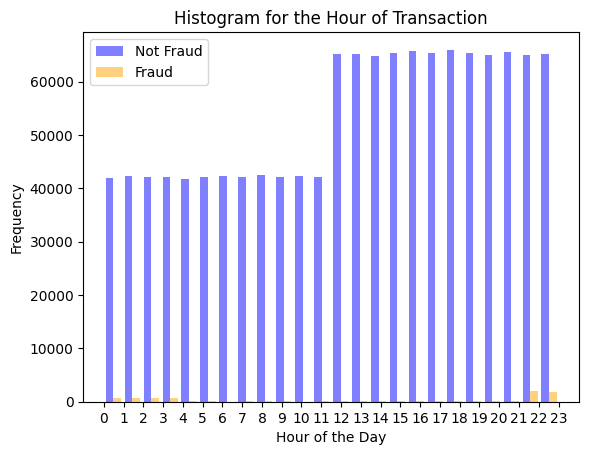

In [ ]:
# histogram for the hour of the transaction
train_data['trans_hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
test_data['trans_hour'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
plt.hist([train_data[train_data['is_fraud'] == 0]['trans_hour'], train_data[train_data['is_fraud'] == 1]['trans_hour']], bins=24, alpha=0.5, label=['Not Fraud', 'Fraud'], color=['blue', 'orange'])
# Add labels and legend
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.xticks(range(24))  # Set x-axis ticks to display all hours
plt.legend()
plt.title('Histogram for the Hour of Transaction')
# Show the histograms
plt.show()

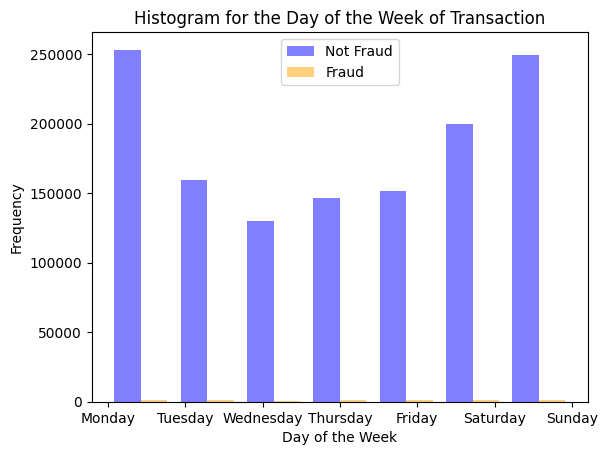

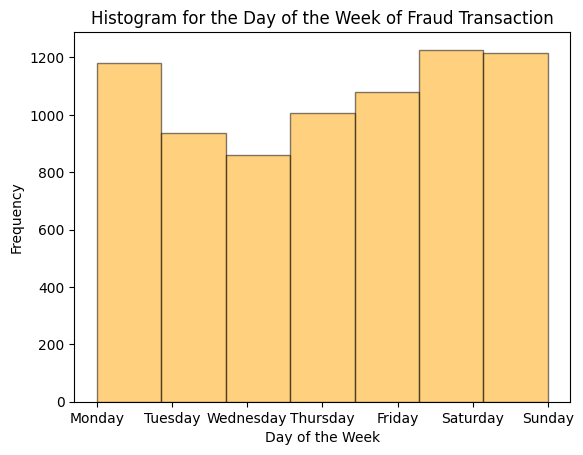

In [ ]:
# histogram for the weekdays of the transaction
train_data['trans_weekday'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
test_data['trans_weekday'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
plt.hist([train_data[train_data['is_fraud'] == 0]['trans_weekday'], train_data[train_data['is_fraud'] == 1]['trans_weekday']], bins=7, alpha=0.5, label=['Not Fraud', 'Fraud'], color=['blue', 'orange'])
# Add labels and legend
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week)  # Set x-axis ticks to display all hours
plt.legend()
plt.title('Histogram for the Day of the Week of Transaction')
# Show the histograms
plt.show()

# histogram for the weekdays of fraud transaction
plt.hist(train_data[train_data['is_fraud'] == 1]['trans_weekday'], bins=7, alpha = 0.5, color='orange', edgecolor='black')
# Add labels and legend
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(range(7), days_of_week)  # Set x-axis ticks to display all hours
plt.title('Histogram for the Day of the Week of Fraud Transaction')
# Show the histograms
plt.show()

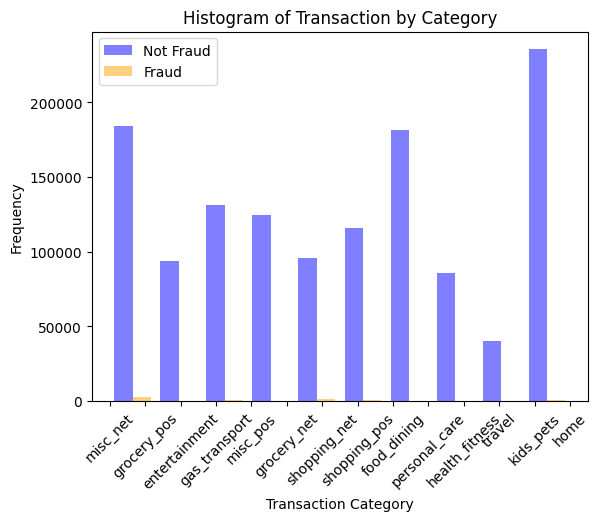

In [ ]:
# histogram for the weekdays of the transaction
plt.hist([train_data[train_data['is_fraud'] == 0]['category'], train_data[train_data['is_fraud'] == 1]['category']], alpha=0.5, label=['Not Fraud', 'Fraud'], color=['blue', 'orange'])
# Add labels and legend
plt.xlabel('Transaction Category')
plt.ylabel('Frequency')
plt.legend()
plt.xticks(rotation=45)
plt.title('Histogram of Transaction by Category')
# Show the histograms
plt.show()

### Non-numerical variables

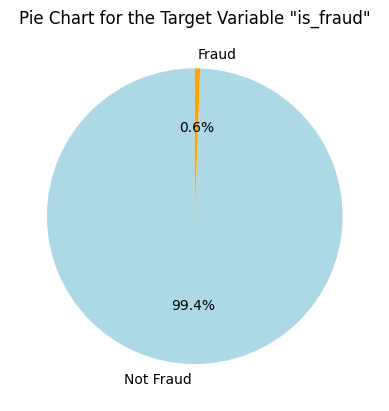

In [ ]:
plt.pie(train_data['is_fraud'].value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Pie Chart for the Target Variable "is_fraud"')
plt.show()

## Correlation Analysis

### Heatmap

[Text(0, 0.5, 'Unnamed: 0'),
 Text(0, 1.5, 'cc_num'),
 Text(0, 2.5, 'amt'),
 Text(0, 3.5, 'zip'),
 Text(0, 4.5, 'lat'),
 Text(0, 5.5, 'long'),
 Text(0, 6.5, 'city_pop'),
 Text(0, 7.5, 'unix_time'),
 Text(0, 8.5, 'merch_lat'),
 Text(0, 9.5, 'merch_long'),
 Text(0, 10.5, 'is_fraud'),
 Text(0, 11.5, 'trans_hour'),
 Text(0, 12.5, 'trans_weekday')]

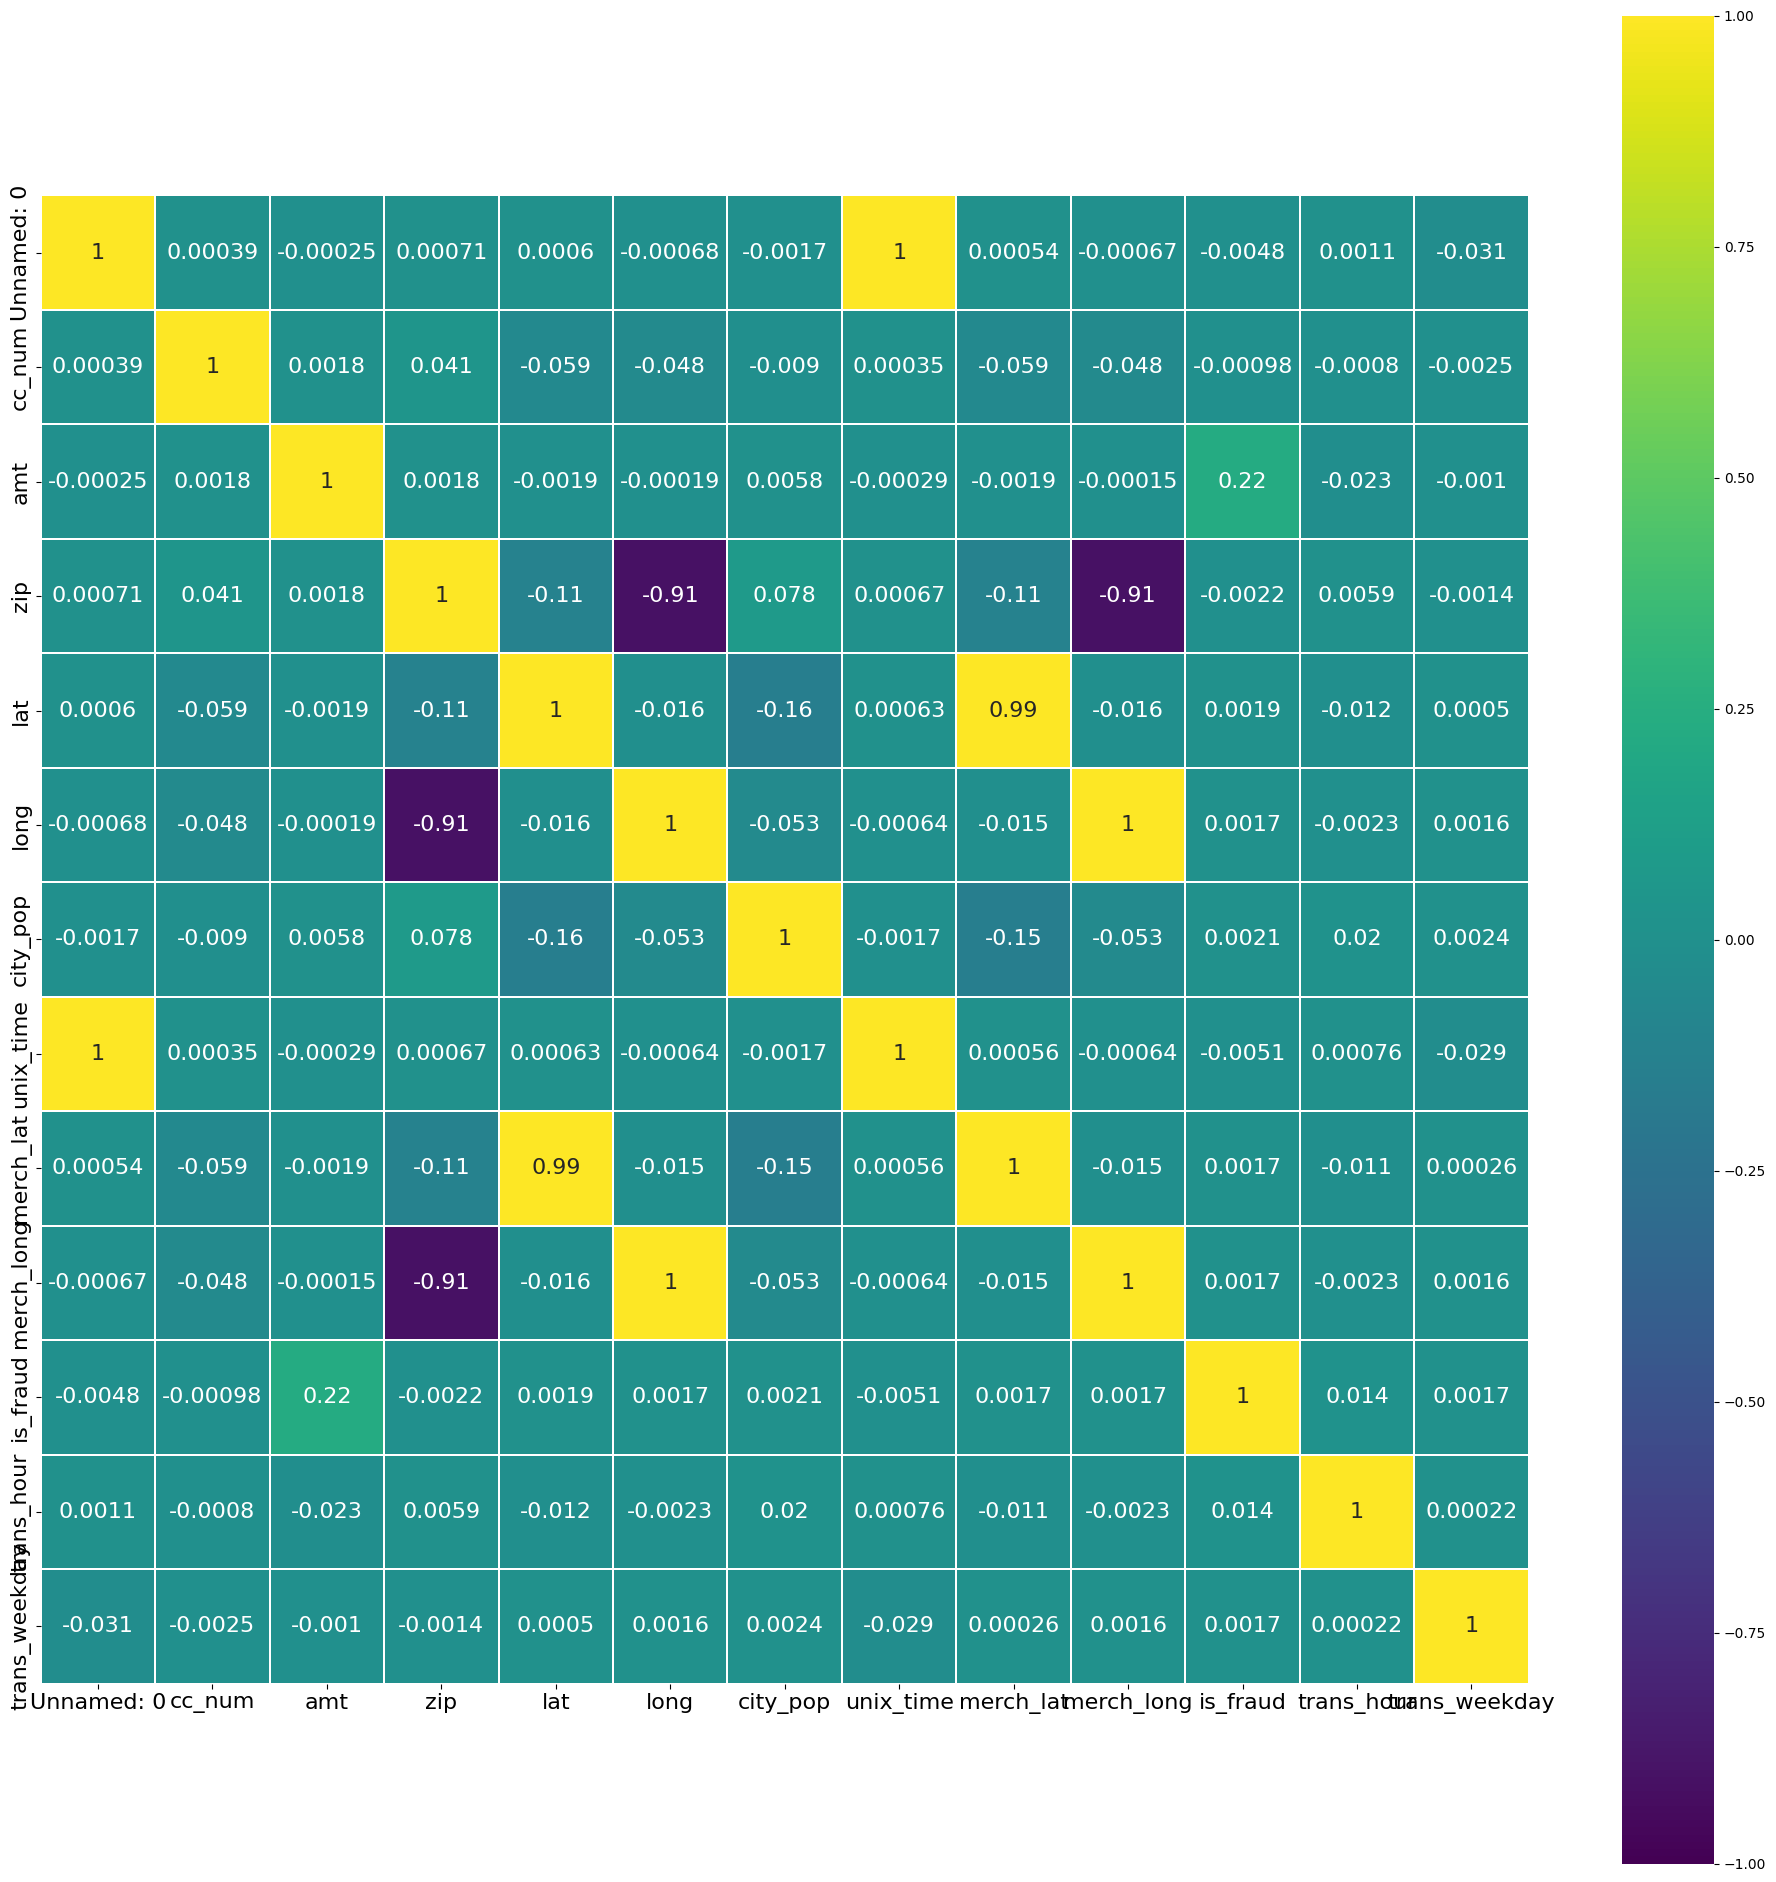

In [ ]:
df_corr = train_data.corr(numeric_only = True)
plt.figure(figsize=(24, 24))

heat = sns.heatmap(df_corr,
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 16}, square=True)
heat.set_xticklabels(heat.get_xticklabels(), size=16)
heat.set_yticklabels(heat.get_yticklabels(), size=16)

### Correlation between variables and 'is_fraud'

In [ ]:
isfraud_corr = df_corr['is_fraud']
golden_features_list = isfraud_corr.sort_values(ascending=False)
print("Correlation with 'is_fraud':\n", golden_features_list)

Correlation with 'is_fraud':
 is_fraud         1.000000
amt              0.219404
trans_hour       0.013799
city_pop         0.002136
lat              0.001894
merch_lat        0.001741
trans_weekday    0.001739
merch_long       0.001721
long             0.001721
cc_num          -0.000981
zip             -0.002162
Unnamed: 0      -0.004767
unix_time       -0.005078
Name: is_fraud, dtype: float64


## Feature Engineering

In [ ]:
# Drop unnecesary columns
unnecessary_columns = ['first', 'last', 'street', 'city', 'state', 'trans_num']

train_data = train_data.drop(columns = unnecessary_columns)
test_data = test_data.drop(columns = unnecessary_columns)

In [ ]:
# Change date of birth to age
train_data['dob'] = pd.to_datetime(train_data['dob'])
date_today = datetime.now()

# Calculate age of the person based on his/her birthday
train_data['age'] = date_today.year - train_data['dob'].dt.year

# For test data too
test_data['dob'] = pd.to_datetime(test_data['dob'])
date_today = datetime.now()

test_data['age'] = date_today.year - test_data['dob'].dt.year

In [ ]:
# Convert some of the categorical variables to counts (number of occurrences)

def count_encoding(data, original_column, encoded_column):

  category_counts = data[original_column].value_counts()
  data[encoded_column] = data[original_column].map(category_counts)

  return data

train_data = count_encoding(train_data, 'category', 'category_count')
train_data = count_encoding(train_data, 'merchant', 'merchant_count')
train_data = count_encoding(train_data, 'job', 'job_count')
train_data = count_encoding(train_data, 'cc_num', 'cc_count')
train_data = count_encoding(train_data, 'zip', 'zip_count')

test_data = count_encoding(test_data, 'category', 'category_count')
test_data = count_encoding(test_data, 'merchant', 'merchant_count')
test_data = count_encoding(test_data, 'job', 'job_count')
test_data = count_encoding(test_data, 'cc_num', 'cc_count')
test_data = count_encoding(test_data, 'zip', 'zip_count')

In [ ]:
# Drop the transformed columns
transformed_columns = ['Unnamed: 0', 'trans_date_trans_time', 'dob', 'category', 'merchant', 'job', 'cc_num', 'unix_time', 'zip']

train_data_transformed = train_data.drop(columns = transformed_columns)
test_data_transformed = test_data.drop(columns = transformed_columns)

In [ ]:
# One-hot encoding for gender (training set)
gender_dummies = pd.get_dummies(train_data_transformed['gender'], prefix='gender')

# Create new columns for the one-hot encoded variable
train_data_transformed = pd.concat([train_data_transformed, gender_dummies], axis=1)
train_data_transformed = train_data_transformed.drop(columns = 'gender')

In [ ]:
# One-hot encoding for gender (testing set)
gender_dummies = pd.get_dummies(test_data_transformed['gender'], prefix='gender')

test_data_transformed = pd.concat([test_data_transformed, gender_dummies], axis=1)
test_data_transformed = test_data_transformed.drop(columns = 'gender')

In [ ]:
# Scale specific numerical variables:

scale_columns = ['amt', 'city_pop', 'age', 'zip_count', 'cc_count', 'category_count', 'merchant_count', 'job_count']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
train_data_transformed[scale_columns] = scaler.fit_transform(train_data_transformed[scale_columns])
test_data_transformed[scale_columns] = scaler.fit_transform(test_data_transformed[scale_columns])

## Oversampling using SMOTE

In [ ]:
# Initialize SMOTE
smote = SMOTE()

X_train = train_data_transformed.drop('is_fraud', axis=1)  # Features
y_train = train_data_transformed['is_fraud']               # Target variable
X_test = test_data_transformed.drop('is_fraud', axis=1)
y_test = test_data_transformed['is_fraud']

# Apply SMOTE only on training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

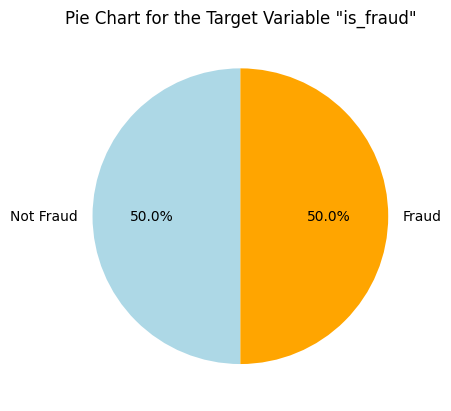

In [ ]:
plt.pie(y_train_smote.value_counts(), labels=['Not Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title('Pie Chart for the Target Variable "is_fraud"')
plt.show()

## Modeling

In [ ]:
# To speed up the modeling process, here we reduce the size of both training and testing set to 1% of its original size.

# Sample 1% of the test data and labels without replacement

X_train_smote = X_train_smote.sample(frac=0.01, random_state=42, replace=False)
y_train_smote = y_train_smote.loc[X_train_smote.index]

X_test = X_test.sample(frac=0.01, random_state=42, replace=False)
y_test = y_test.loc[X_test.index]

#### 1. Logistic Regression (Baseline)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

# Fit the training data
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_smote, y_train_smote)

# Predict test data using the model
logistic_pred = logistic_model.predict(X_test)

# Compute accuracy, confusion matrix, precision and recall
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_confusion_matrix = confusion_matrix(y_test, logistic_pred)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)

print("Logistic Regression Accuracy:", logistic_accuracy)
print("Logistic Regression Confusion Matrix:\n", logistic_confusion_matrix)
print("Logistic Regression Precision:", logistic_precision)
print("Logistic Regression Recall:", logistic_recall)

Logistic Regression Accuracy: 0.9510527262911643
Logistic Regression Confusion Matrix:
 [[5274  270]
 [   2   11]]
Logistic Regression Precision: 0.03914590747330961
Logistic Regression Recall: 0.8461538461538461


#### 2. Support Vector Machine

In [ ]:
from sklearn.svm import SVC

# Fit the training data
svm_model = SVC()
svm_model.fit(X_train_smote, y_train_smote)

# Predict test data using the model
svm_pred = svm_model.predict(X_test)

# Compute accuracy, confusion matrix, precision and recall
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_confusion_matrix = confusion_matrix(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)

print("SVM Accuracy:", svm_accuracy)
print("SVM Confusion Matrix:\n", svm_confusion_matrix)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)

SVM Accuracy: 0.975706316357747
SVM Confusion Matrix:
 [[5411  133]
 [   2   11]]
SVM Precision: 0.0763888888888889
SVM Recall:
 0.8461538461538461


#### 3. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Fit the training data
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train_smote, y_train_smote)

# Predict test data using the model
random_forest_pred = random_forest_model.predict(X_test)

# Compute accuracy, confusion matrix, precision and recall
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_pred)
random_forest_precision = precision_score(y_test, random_forest_pred)
random_forest_recall = recall_score(y_test, random_forest_pred)

print("Random Forest Accuracy:", random_forest_accuracy)
print("Random Forest Confusion Matrix:\n", random_forest_confusion_matrix)
print("Random Forest Precision:", random_forest_precision)
print("Random Forest Recall:", random_forest_recall)

Random Forest Accuracy: 0.9580709015655929
Random Forest Confusion Matrix:
 [[5312  232]
 [   1   12]]
Random Forest Precision: 0.04918032786885246
Random Forest Recall: 0.9230769230769231


#### 4. Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Fit the training data
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost_model = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

adaboost_model.fit(X_train_smote, y_train_smote)

# Predict test data using the model
adaboost_pred = adaboost_model.predict(X_test)

# Compute accuracy, confusion matrix, precision and recall
adaboost_accuracy = accuracy_score(y_test, adaboost_pred)
adaboost_confusion_matrix = confusion_matrix(y_test, adaboost_pred)
adaboost_precision = precision_score(y_test, adaboost_pred)
adaboost_recall = recall_score(y_test, adaboost_pred)

print("Adaboost Accuracy:", adaboost_accuracy)
print("Adaboost Confusion Matrix:\n", adaboost_confusion_matrix)
print("Adaboost Precision:", adaboost_precision)
print("Adaboost Recall:", adaboost_recall)

Adaboost Accuracy: 0.9330574050746806
Adaboost Confusion Matrix:
 [[5173  371]
 [   1   12]]
Adaboost Precision: 0.031331592689295036
Adaboost Recall: 0.9230769230769231


## Results & Visualization

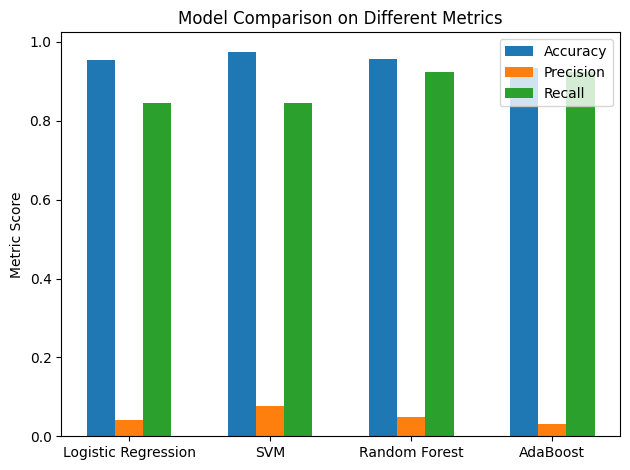

In [ ]:
# Summarize all the results
accuracy_scores = [logistic_accuracy, svm_accuracy, random_forest_accuracy, adaboost_accuracy]
precision_scores = [logistic_precision, svm_precision, random_forest_precision, adaboost_precision]
recall_scores = [logistic_recall, svm_recall, random_forest_recall, adaboost_recall]
labels = ['Logistic Regression', 'SVM', 'Random Forest', 'AdaBoost']

# Set-up
x = np.arange(len(labels))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width, accuracy_scores, width, label='Accuracy')
ax.bar(x, precision_scores, width, label='Precision')
ax.bar(x + width, recall_scores, width, label='Recall')

# Add labels
ax.set_ylabel('Metric Score')
ax.set_title('Model Comparison on Different Metrics')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
# Find the weights for each predictors in the logistic model:
coefficients = logistic_model.coef_[0]
feature_names = X_train_smote.columns

print("Coefficients (Weights) of Predictors in the Logistic Regression Model:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")

Coefficients (Weights) of Predictors in the Logistic Regression Model:
amt: 1.3389812648196522
lat: -0.013001615867255125
long: 0.00929960715124836
city_pop: -0.07709674233765948
merch_lat: 0.0156403761560851
merch_long: -0.0065517036563598405
trans_hour: -0.010443372363699075
trans_weekday: -0.05404889969167439
age: -0.1919880011591424
category_count: 0.4844526889826221
merchant_count: -0.13922953639888752
job_count: -0.03454083858780614
cc_count: -0.610610154084954
zip_count: 0.006756337377829988
gender_F: -5.770520246085886
gender_M: -6.115210046863599


In [ ]:
# Feature importance from Random Forest:

importances = random_forest_model.feature_importances_

for i in range(len(importances)):
    print(f"Feature {i + 1} ({X_train_smote.columns[i]}): {importances[i]}")

Feature 1 (amt): 0.4476628220718097
Feature 2 (lat): 0.01084624712700246
Feature 3 (long): 0.010434070711311718
Feature 4 (city_pop): 0.012801807389679508
Feature 5 (merch_lat): 0.011892434446106746
Feature 6 (merch_long): 0.012023005710318252
Feature 7 (trans_hour): 0.17329036295479255
Feature 8 (trans_weekday): 0.009232432269381304
Feature 9 (age): 0.01801714592415737
Feature 10 (category_count): 0.09711571712484729
Feature 11 (merchant_count): 0.044549388960249445
Feature 12 (job_count): 0.01244998396422763
Feature 13 (cc_count): 0.0635703094088899
Feature 14 (zip_count): 0.04640353826171708
Feature 15 (gender_F): 0.015023422707943282
Feature 16 (gender_M): 0.014687310967565665


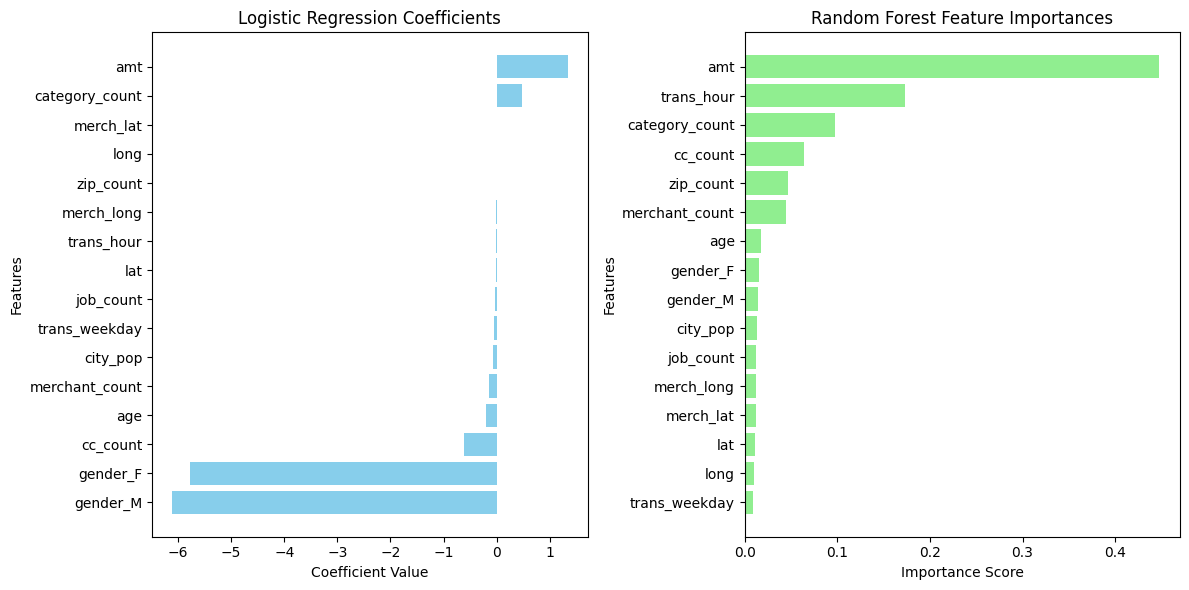

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Sort the weights/importances

sorted_coef = np.argsort(coefficients)
sorted_importance = np.argsort(importances)

# Logistic regression coefficients
axes[0].barh(np.array(feature_names)[sorted_coef], coefficients[sorted_coef], color='skyblue')
axes[0].set_title('Logistic Regression Coefficients')
axes[0].set_xlabel('Coefficient Value')
axes[0].set_ylabel('Features')

# Random Forest feature importances
axes[1].barh(np.array(feature_names)[sorted_importance], importances[sorted_importance], color='lightgreen')
axes[1].set_title('Random Forest Feature Importances')
axes[1].set_xlabel('Importance Score')
axes[1].set_ylabel('Features')

plt.tight_layout()
plt.show()